In [18]:
import pandas as pd

df = pd.read_csv('titanic_dataset.csv')

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
# info and missing values
print(df.info())
print(df.isnull().sum())

# Dropping duplicates
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

In [20]:
# Filling missing values
df = df.drop(columns=['Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill missing ages with median
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])  # Fill missing embarked with most frequent

df['Age'] = df['Age'].round().astype(int)

# Removing outliers in Age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds (1.5*IQR is standard)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only ages within bounds
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Converting categorical columns to 'category' type
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
# Numeric columns
print(df.describe())

# Categorical columns
print(df.describe(include='object'))

       PassengerId    Survived      Pclass         Age       SibSp  \
count   825.000000  825.000000  825.000000  825.000000  825.000000   
mean    447.369697    0.380606    2.341818   28.509091    0.507879   
std     257.088865    0.485830    0.824096   10.177799    1.090670   
min       1.000000    0.000000    1.000000    3.000000    0.000000   
25%     226.000000    0.000000    2.000000   22.000000    0.000000   
50%     445.000000    0.000000    3.000000   28.000000    0.000000   
75%     671.000000    1.000000    3.000000   34.000000    1.000000   
max     891.000000    1.000000    3.000000   54.000000    8.000000   

            Parch        Fare  
count  825.000000  825.000000  
mean     0.357576   31.483615  
std      0.798599   49.956429  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   13.416700  
75%      0.000000   30.070800  
max      6.000000  512.329200  
                           Name    Ticket
count                       825       8

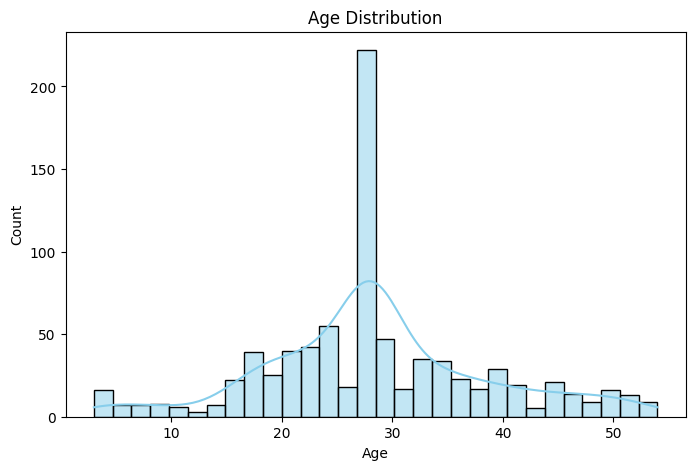

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()



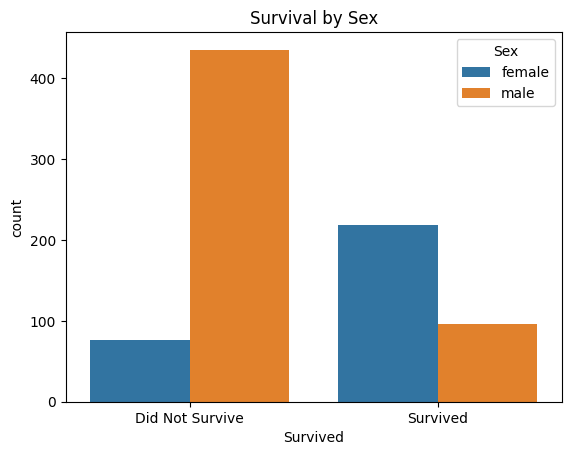

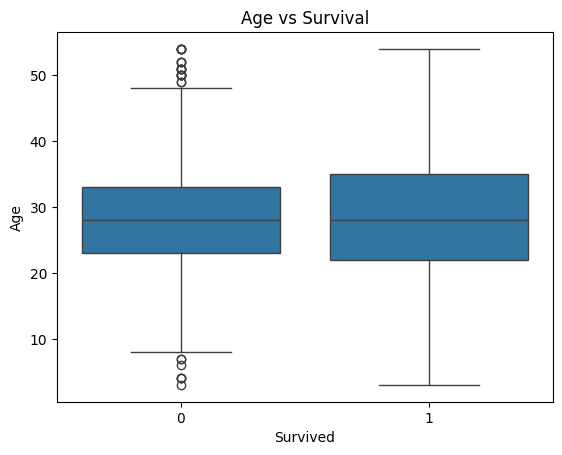

In [28]:
# Survival vs Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.xticks([0,1], ['Did Not Survive', 'Survived'])
plt.title('Survival by Sex')
plt.show()


# Age vs Survival (boxplot)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.show()